# Plots Example

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

from plottable import ColumnDefinition, Table
from plottable.formatters import decimal_to_percent
from plottable.plots import bar, percentile_bars, percentile_stars, progress_donut, sparklines

In [2]:
cmap = LinearSegmentedColormap.from_list(
    name="bugw", colors=["#ffffff", "#f2fbd2", "#c9ecb4", "#93d3ab", "#35b0ab"], N=256
)

## Table Example with plots

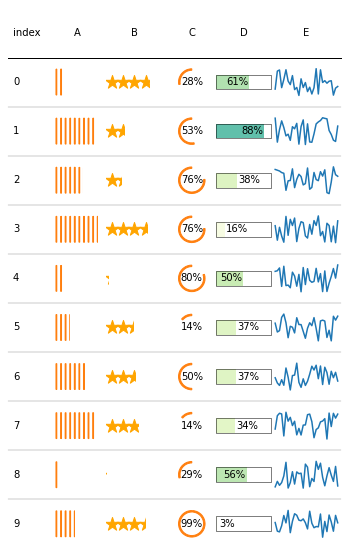

In [3]:
fig, ax = plt.subplots(figsize=(6, 10))

d = pd.DataFrame(np.random.random((10, 4)), columns=["A", "B", "C", "D"]).round(2)
d['E'] = np.random.random(size=(10,30)).tolist()

tab = Table(
    d,
    cell_kw={
        "linewidth": 0,
        "edgecolor": "k",
    },
    textprops={"ha": "center"},
    column_definitions=[
        ColumnDefinition("index", textprops={"ha": "left"}),
        ColumnDefinition("A", plot_fn=percentile_bars, plot_kw={"is_pct": True}),
        ColumnDefinition(
            "B", width=1.5, plot_fn=percentile_stars, plot_kw={"is_pct": True}
        ),
        ColumnDefinition(
            "C",
            plot_fn=progress_donut,
            plot_kw={
                "is_pct": True,
                "formatter": "{:.0%}"
                },
        ),
        ColumnDefinition(
            "D",
            width=1.25,
            plot_fn=bar,
            plot_kw={
                "cmap": cmap,
                "plot_bg_bar": True,
                "annotate": True,
                "height": 0.5,
                "lw": 0.5,
                "formatter": decimal_to_percent,
            },
        ),
        ColumnDefinition(
            "E",
            width=1.5,
            plot_fn=sparklines
        ),        
    ],
)

plt.show()

For Column "C" we used python formatting syntax to format decimals to percent values. We do this by supplying the formatter string to the plot_kw dictionary.

```python
ColumnDefinition(
    "C",
    plot_fn=progress_donut,
    plot_kw={
        "is_pct": True,
        "formatter": "{:.0%}"
        },
    ),
```

For columns D we used a formatter function from plottable.formatters. We pass it to the plot_kw dictionary in the same way as a formatter string.  
We also provide further keywords to style the plot.

```python
ColumnDefinition(
    "D",
    width=1.25,
    plot_fn=bar,
    plot_kw={
        "cmap": cmap,
        "plot_bg_bar": True,
        "annotate": True,
        "height": 0.5,
        "lw": 0.5,
        "formatter": decimal_to_percent,
    },
)
```
